In [27]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as pl

import statsmodels.api as sm

from statsmodels.graphics.api import qqplot

%pylab inline
import matplotlib
matplotlib.style.use('fivethirtyeight')
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [28]:
matplotlib.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

In [29]:
data = pd.read_excel("NYCHomelessShelterPopulation-Worksheet1983-Present_Oct2016.xlsx")

In [30]:
data.head()

,Time,Total Population,Total Families,Total Persons in Families,Children,Adults in Families,Single Adults,Single Men,Single Women,Average Shelter Stays for Families (in Days)
0,JAN 1983,NaN,NaN,NaN,NaN,NaN,4509,3975,534,NaN
1,FEB 1983,NaN,1520.0,NaN,NaN,NaN,4850,4274,576,NaN
2,MAR 1983,NaN,1655.0,NaN,NaN,NaN,4991,4413,578,NaN
3,APR 1983,NaN,1761.0,NaN,NaN,NaN,5123,4543,580,NaN
4,MAY 1983,NaN,1839.0,NaN,NaN,NaN,5080,4489,591,NaN


In [31]:
data = data[["Time","Total Population"]]

In [32]:
data.head()

,Time,Total Population
0,JAN 1983,NaN
1,FEB 1983,NaN
2,MAR 1983,NaN
3,APR 1983,NaN
4,MAY 1983,NaN


In [33]:
data.dropna(axis=0,inplace=True)

In [34]:
data.head()

,Time,Total Population
5,JUN 1983,12830.0
6,JUL 1983,12687.0
9,OCT 1983,14238.0
10,NOV 1983,14855.0
12,JAN 1984,15663.0


In [35]:
type(data)

pandas.core.frame.DataFrame

In [36]:
# data["Total Population"] = data["Total Population"].apply(lambda x :x.encode("UTF-8").split(",")[0]+x.encode("UTF-8").split(",")[1]).astype(int)

In [37]:
data["Time"] = data["Time"].apply(lambda x: pd.to_datetime(x))

In [38]:
data.head()

,Time,Total Population
5,1983-06-01,12830.0
6,1983-07-01,12687.0
9,1983-10-01,14238.0
10,1983-11-01,14855.0
12,1984-01-01,15663.0


In [39]:
type(data)

pandas.core.frame.DataFrame

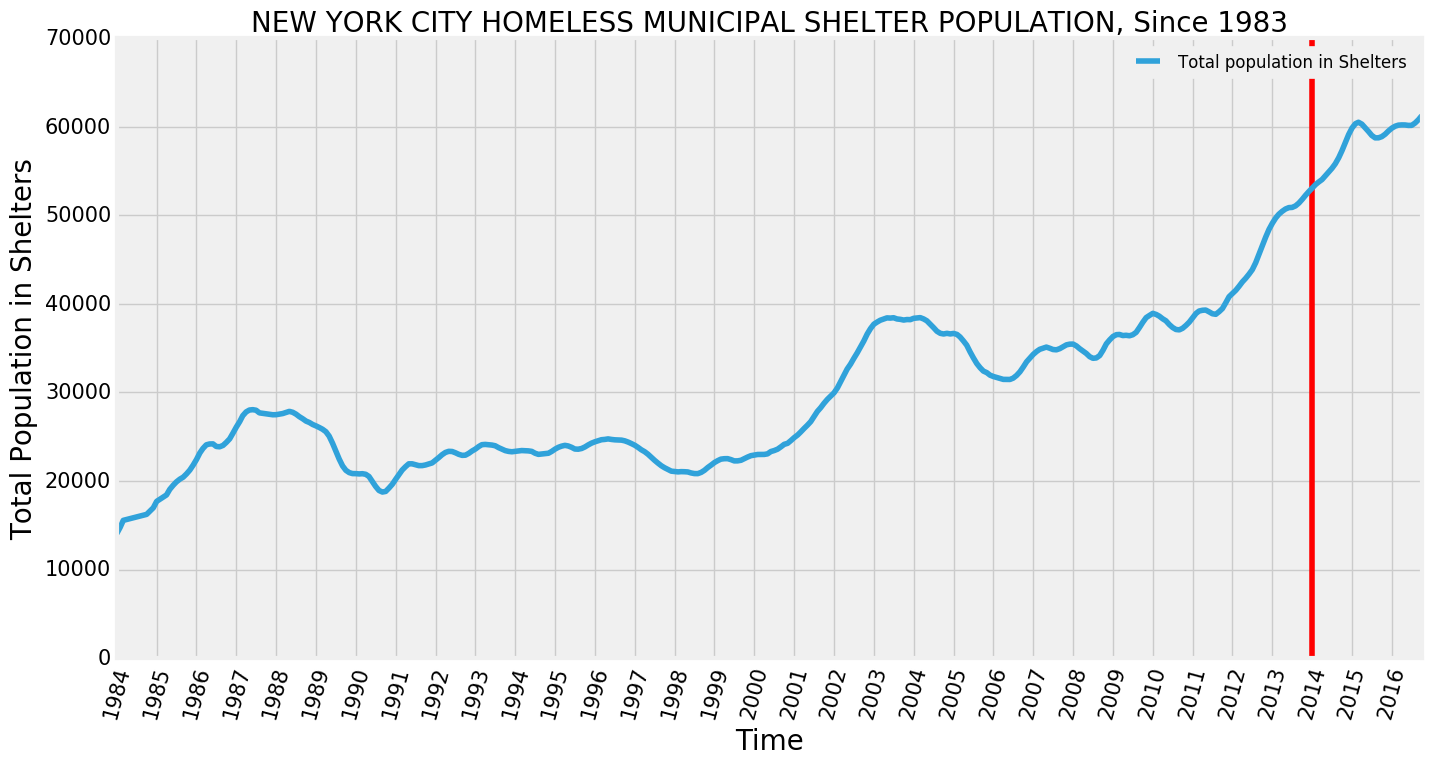

In [40]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import datetime
years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')
monthsFmt = DateFormatter('%m')
ax = pl.figure(figsize = (15,8)).gca()
ax.plot(data["Time"], data["Total Population"].rolling(window = 5).mean(),label="Total population in Shelters")
pl.xlabel('Time', fontsize=20)
pl.ylabel('Total Population in Shelters', fontsize=20)
pl.title("NEW YORK CITY HOMELESS MUNICIPAL SHELTER POPULATION, Since 1983", fontsize=20)
#pl.grid()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months)
# ax.xaxis.set_minor_formatter(monthsFmt)
pl.xticks(rotation = 75, fontsize = 15)
pl.yticks(fontsize = 15)
pl.legend(loc="best")
pl.vlines(datetime.date(2014,1,1), 0, 70000,color="red")
pl.show()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  app.launch_new_instance()


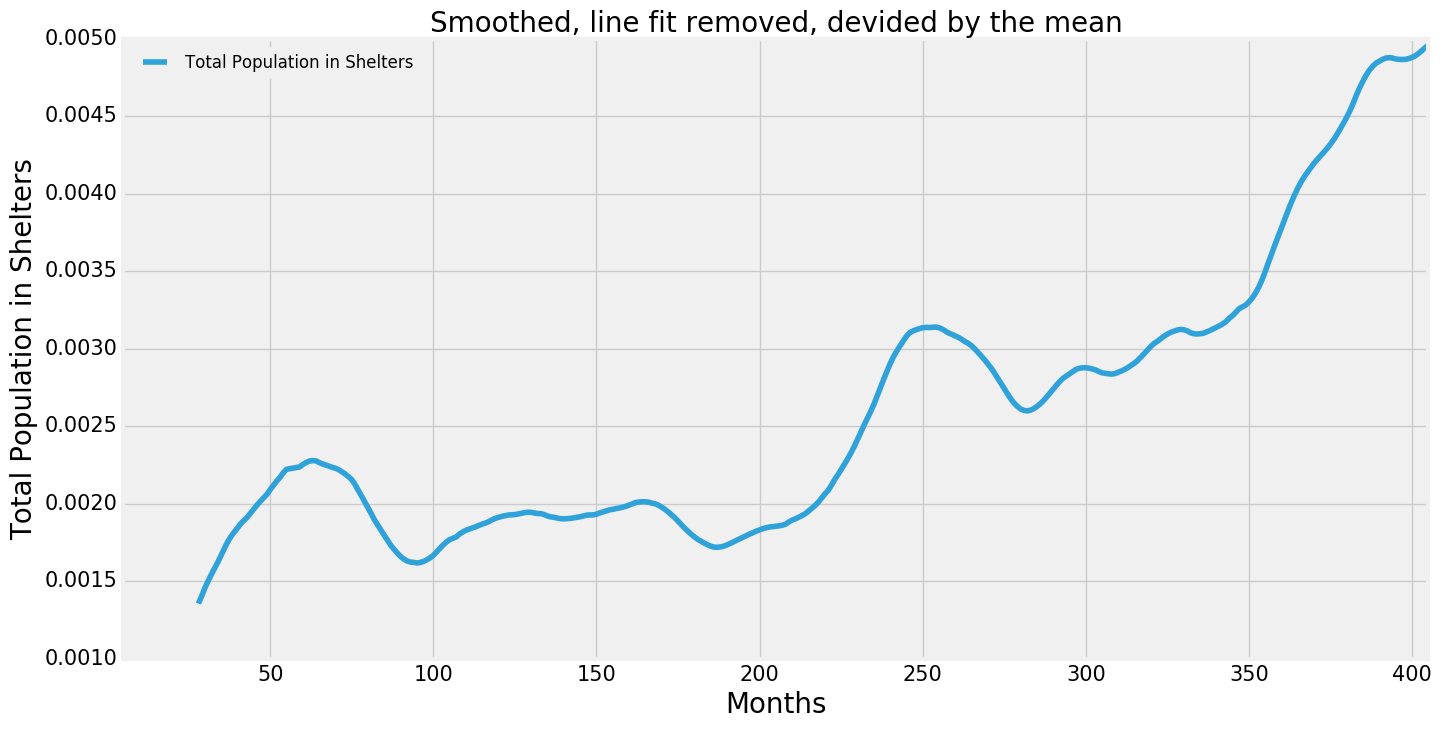

In [41]:
fig = pl.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax = pd.rolling_mean(data["Total Population"]/data["Total Population"].sum(), 12).plot(fontsize=15, label='Total Population in Shelters')

ax.set_title("Smoothed, line fit removed, devided by the mean", fontsize=20)
pl.xlabel("Months", fontsize=20)
pl.ylabel("Total Population in Shelters", fontsize=20)
pl.legend(loc='best')